In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve 
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(907, 27)

In [8]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [10]:
df.isnull().sum().sum()

10445

<function matplotlib.pyplot.show(close=None, block=None)>

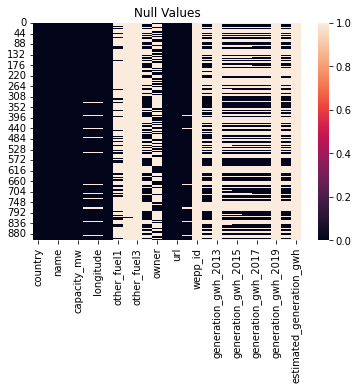

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [13]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [14]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [15]:
df.drop(columns=["country", "country_long", "name", "other_fuel2", "other_fuel3", "wepp_id", "year_of_capacity_data","generation_gwh_2013" ,"generation_gwh_2019", "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [16]:
df.nunique()

gppd_idnr              907
capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [17]:
df.isnull().sum().sum()

4158

In [18]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [19]:
df.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [20]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [21]:
df.isnull().sum().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

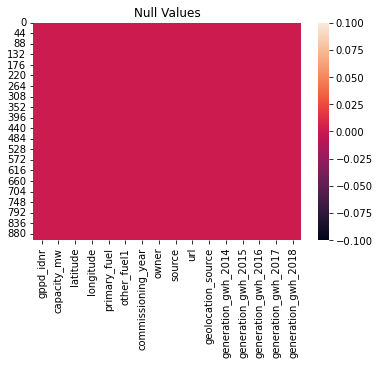

In [22]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [23]:
df.shape

(907, 16)

In [24]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [25]:
df.loc[df['capacity_mw']==" "]

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018


In [26]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(907, 16)

In [29]:
df_cc=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        df_cc.append(i)
print(df_cc)

['gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url', 'geolocation_source']


In [30]:
len(df_cc)

7

In [31]:
df_nc=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        df_nc.append(i)
print(df_nc)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [32]:
len(df_nc)

9

In [33]:
len(df.dtypes.index)==len(df_nc)+len(df_cc)

True

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


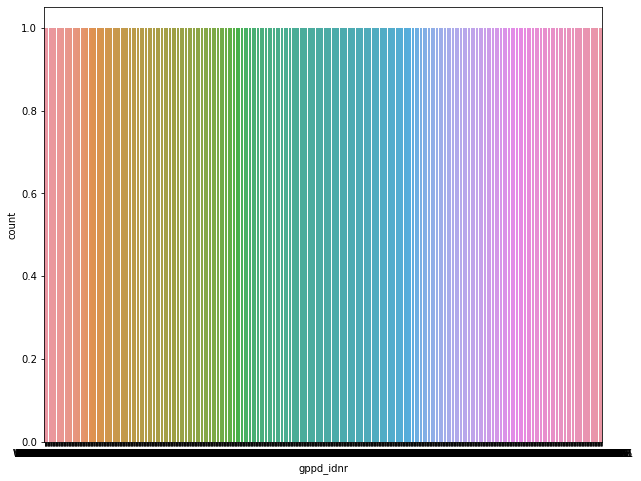

In [34]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="gppd_idnr",data=df)
print(df["gppd_idnr"].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


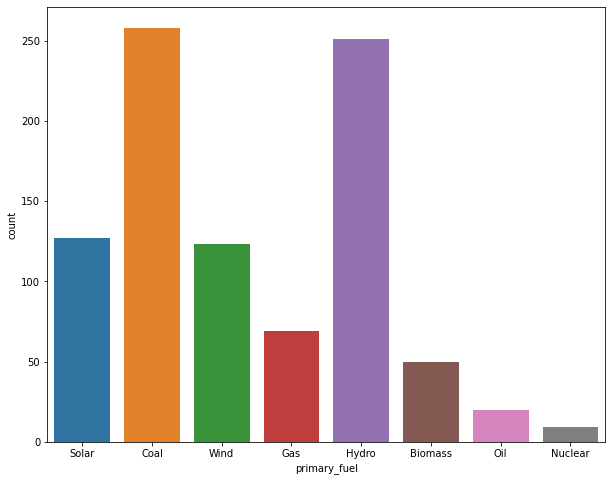

In [35]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="primary_fuel",data=df)
print(df["primary_fuel"].value_counts())

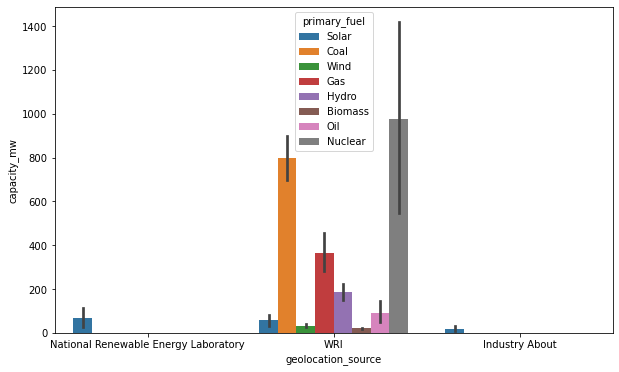

In [36]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df,hue='primary_fuel')
plt.show()

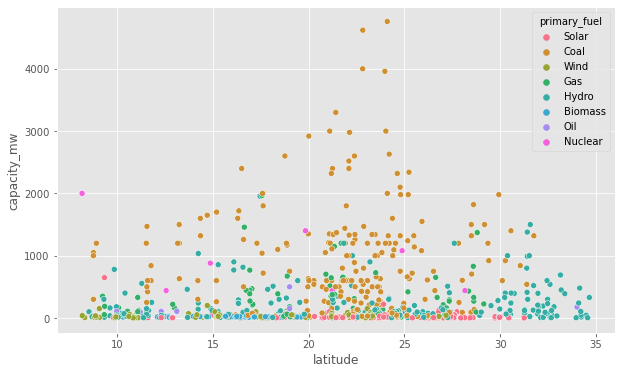

In [37]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.scatterplot(df['latitude'],df["capacity_mw"],hue=df['primary_fuel']);

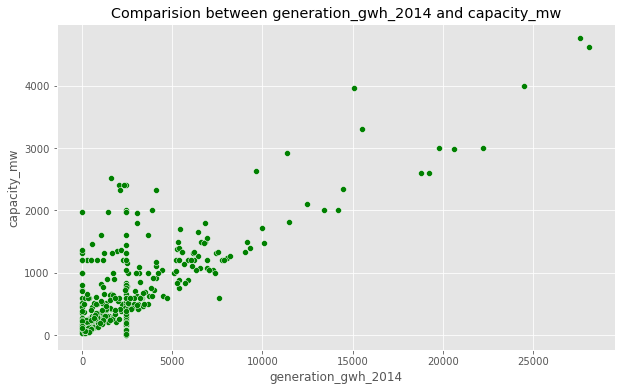

In [38]:
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="g")
plt.show()

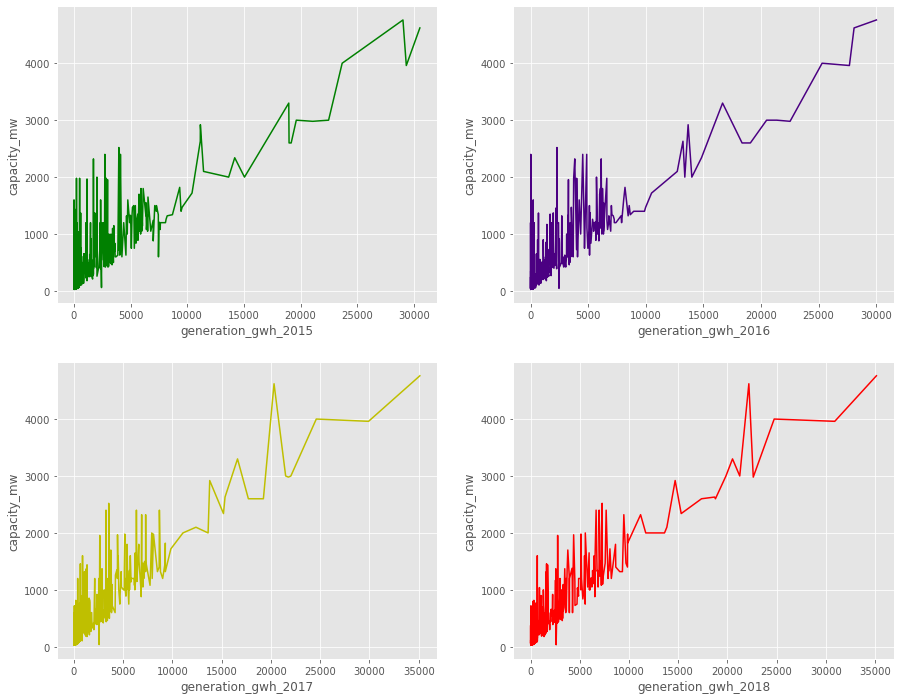

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="g")
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="y")
sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

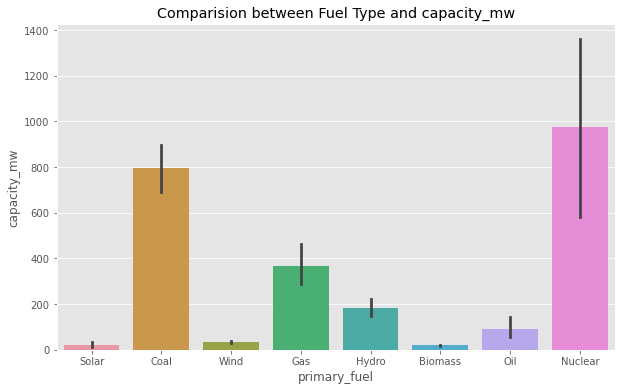

In [40]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

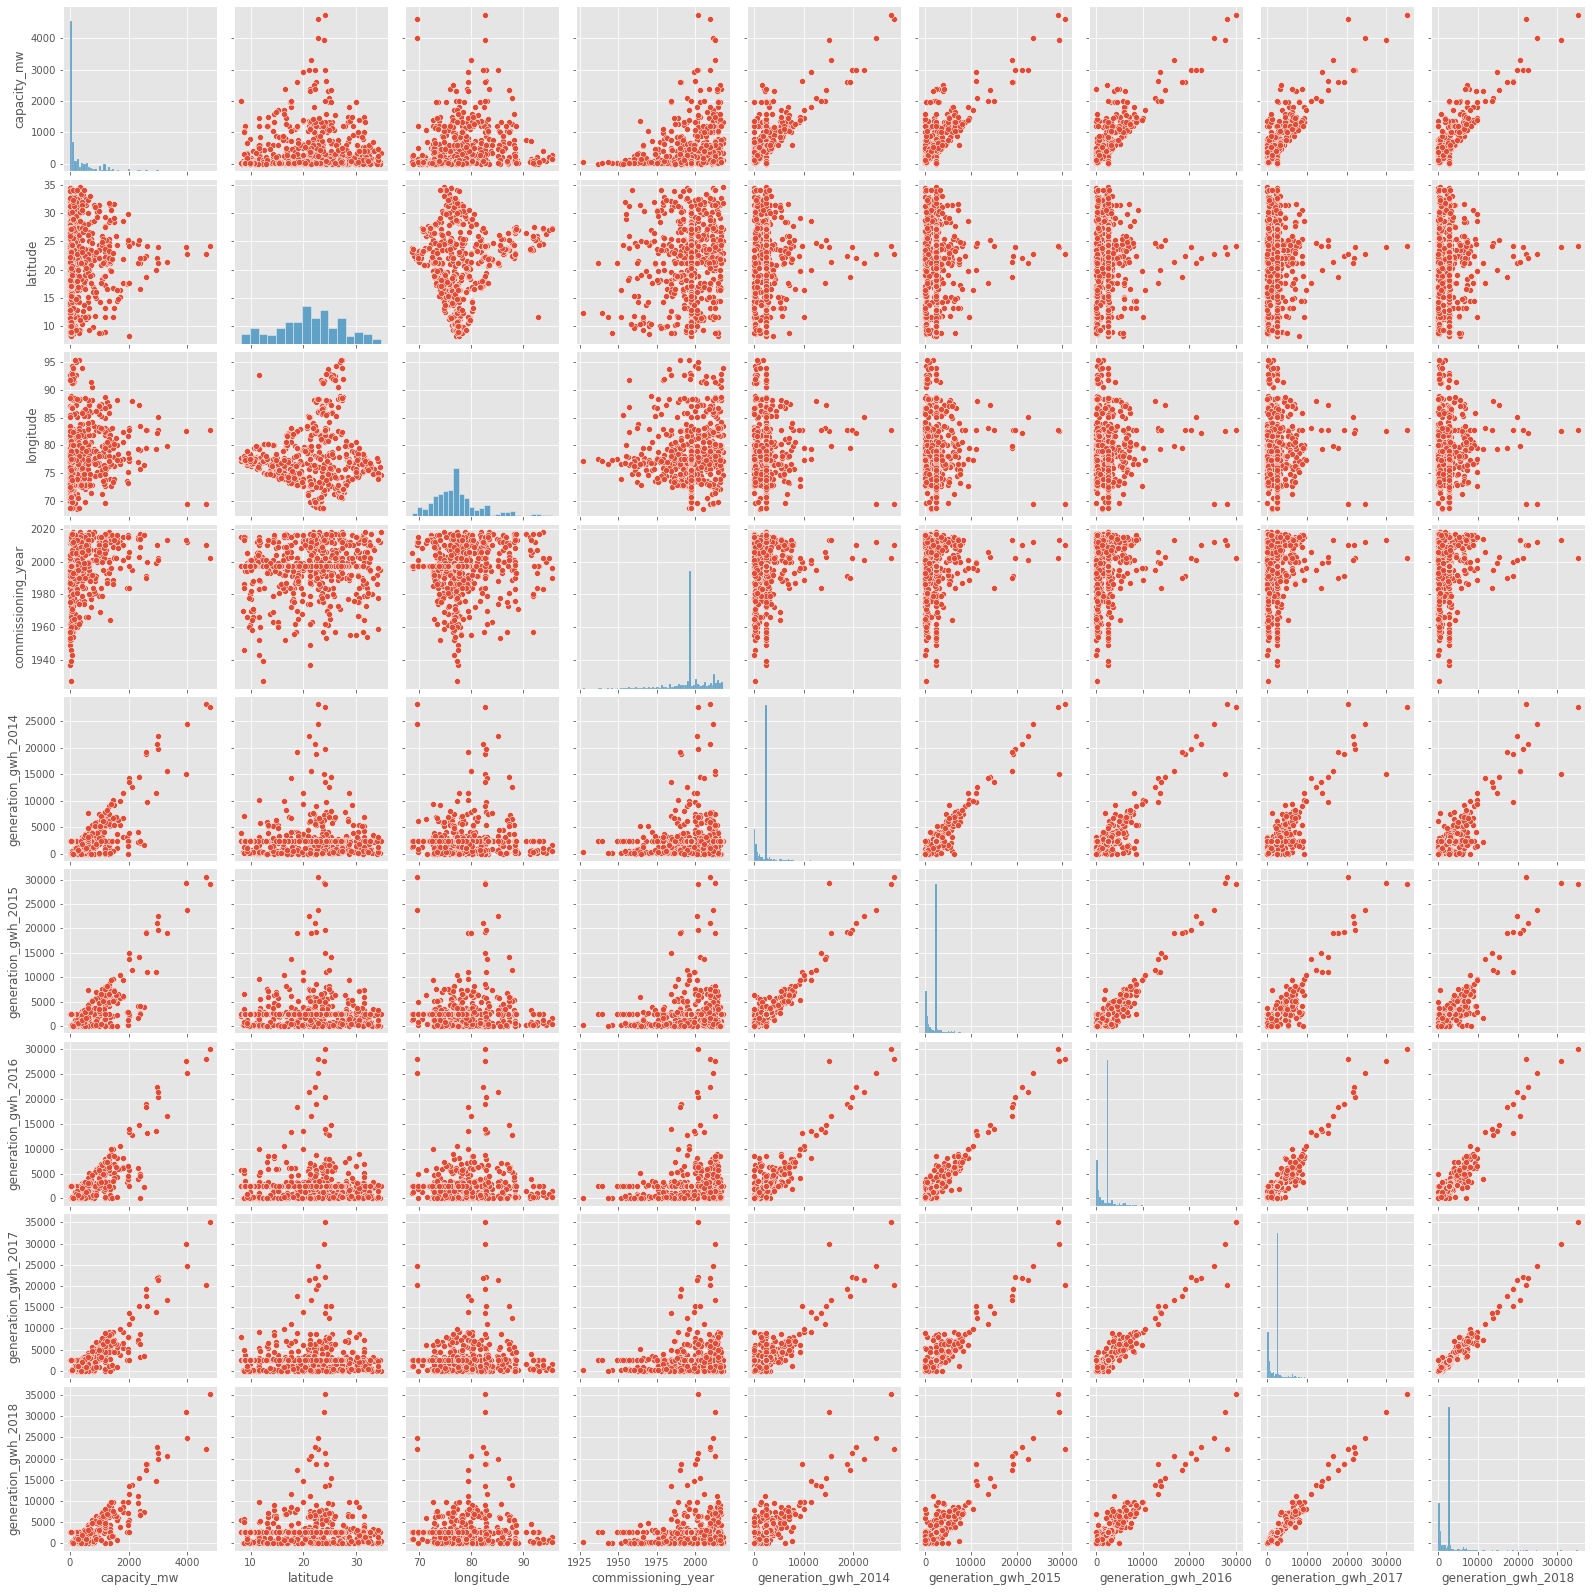

In [41]:
sns.pairplot(df)

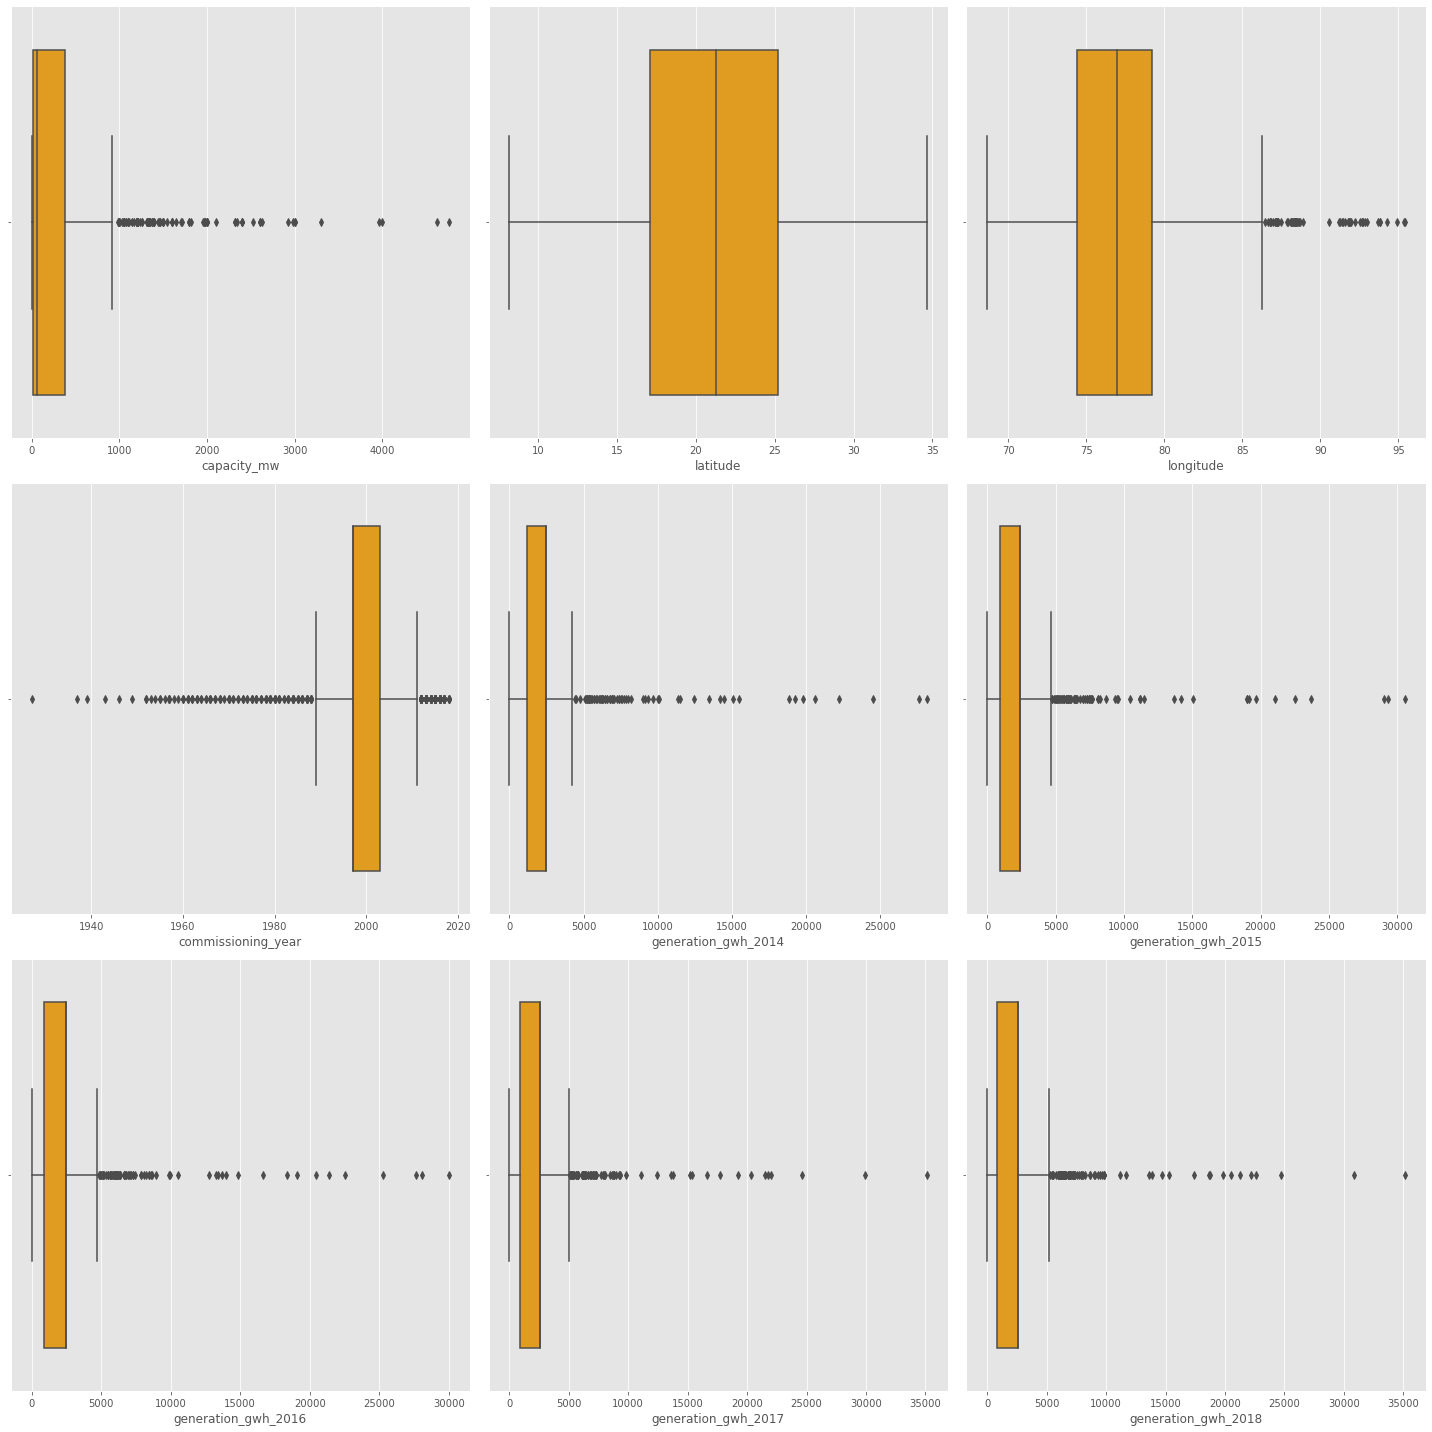

In [42]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df_nc:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="orange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [43]:
f = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'commissioning_year']]
from scipy.stats import zscore
z=np.abs(zscore(f))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,commissioning_year
0,0.878280,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.069162e+00
1,0.593788,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.747794e-14
2,1.682394,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.747794e-14
3,2.889052,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,5.310801e-01
4,1.027976,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,1.376637e+00
...,...,...,...,...,...,...,...
902,0.022477,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01,1.453505e+00
903,0.145644,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.747794e-14
904,0.391673,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.747794e-14
905,0.772866,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.747794e-14


In [44]:
df1 = df[(z<3).all(axis=1)] 
df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [45]:
df.shape

(907, 16)

In [46]:
df1.shape

(855, 16)

In [47]:
Data_loss=((907-855)/907)*100
Data_loss

5.733186328555679

In [48]:
df_cc = ['gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1[df_cc]= df1[df_cc].apply(le.fit_transform)
df1[df_cc]

,gppd_idnr,primary_fuel,other_fuel1,owner,source,url,geolocation_source
0,606,6,2,228,109,128,1
1,468,1,2,257,174,173,2
2,801,7,2,2,21,205,2
3,0,2,2,5,22,58,2
4,1,1,2,5,22,58,2
...,...,...,...,...,...,...,...
902,442,1,2,5,22,58,2
903,770,6,2,114,77,22,0
904,839,7,2,5,21,260,2
905,488,1,2,91,59,82,2


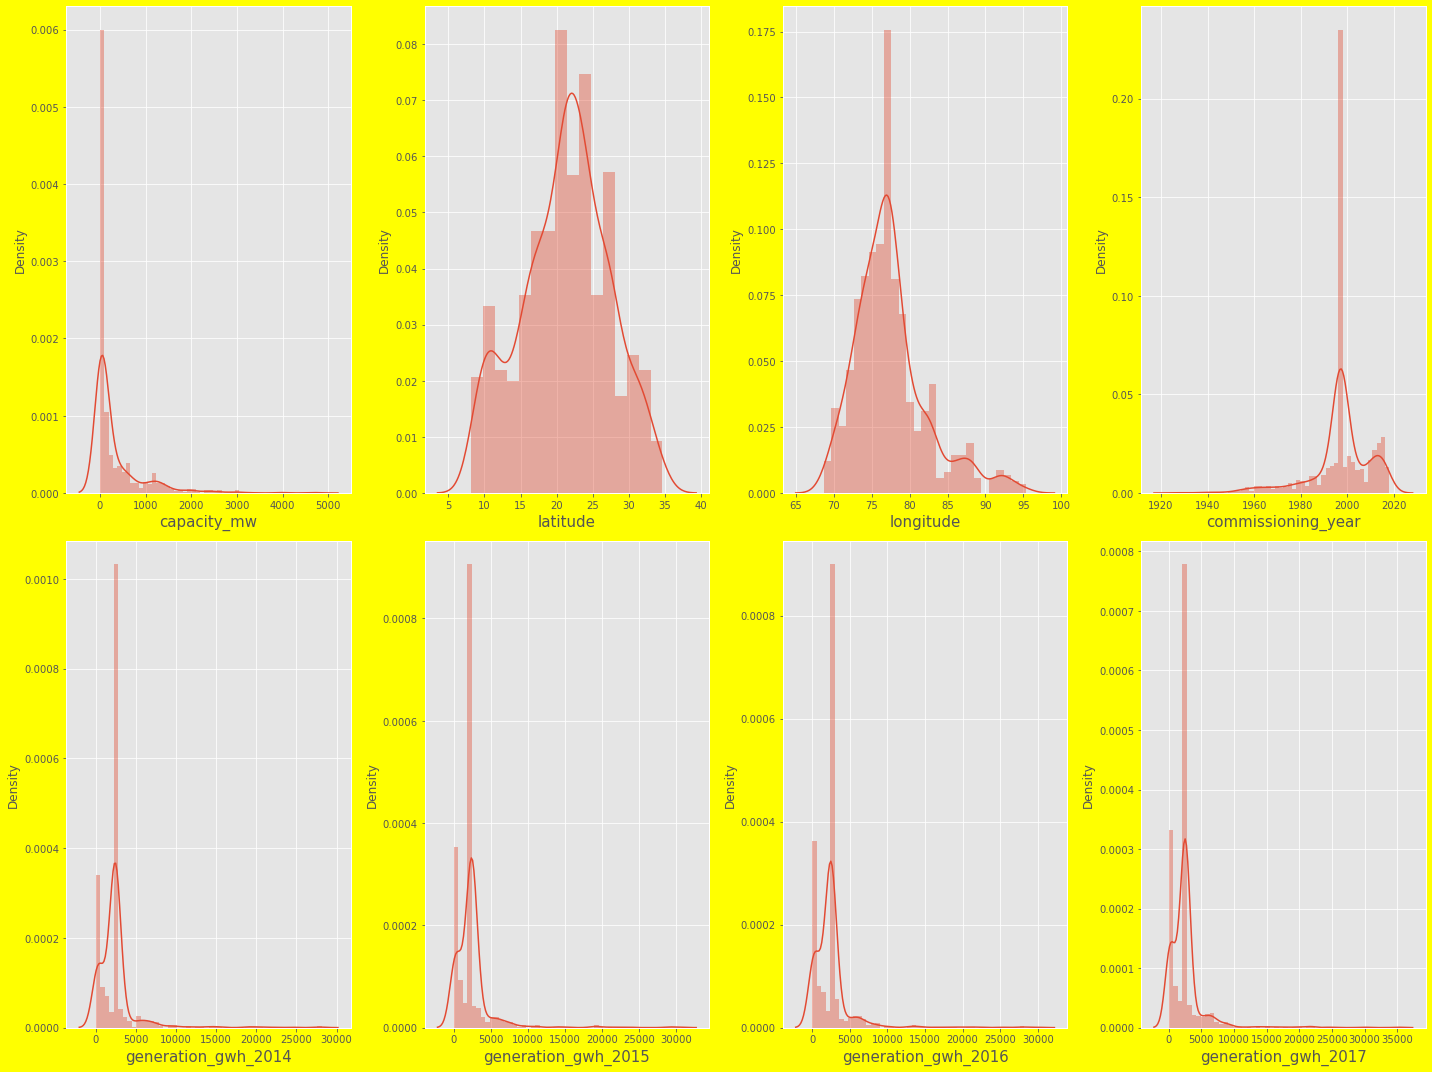

In [49]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df_nc:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    
    plotnumber+=1
plt.tight_layout()

In [50]:
df1.skew()

gppd_idnr               0.000000
capacity_mw             2.163488
latitude               -0.110936
longitude               0.917381
primary_fuel            0.420074
other_fuel1           -19.855877
commissioning_year     -0.836962
owner                   1.279129
source                  1.741703
url                     1.421883
geolocation_source     -2.074380
generation_gwh_2014     1.525975
generation_gwh_2015     1.375828
generation_gwh_2016     1.389992
generation_gwh_2017     1.293269
generation_gwh_2018     1.421012
dtype: float64

In [51]:
df1.skew().sort_values(ascending=False)

capacity_mw             2.163488
source                  1.741703
generation_gwh_2014     1.525975
url                     1.421883
generation_gwh_2018     1.421012
generation_gwh_2016     1.389992
generation_gwh_2015     1.375828
generation_gwh_2017     1.293269
owner                   1.279129
longitude               0.917381
primary_fuel            0.420074
gppd_idnr               0.000000
latitude               -0.110936
commissioning_year     -0.836962
geolocation_source     -2.074380
other_fuel1           -19.855877
dtype: float64

In [52]:
df_nc_scaler = power_transform(df1)

In [53]:
df_nc_scaler

array([[ 0.74504263, -1.67794084,  1.16782724, ...,  0.35354673,
         0.34682982,  0.35699369],
       [ 0.25319793,  0.21491382,  0.59664034, ...,  0.35354673,
         0.34682982,  0.35699369],
       [ 1.38781772, -0.27815638,  0.12206857, ...,  0.35354673,
         0.34682982,  0.35699369],
       ...,
       [ 1.50749257, -0.51038736, -0.96077321, ...,  0.35354673,
         0.34682982,  0.35699369],
       [ 0.32685068,  0.10620325,  0.52739456, ...,  0.35354673,
         0.34682982,  0.35699369],
       [ 1.46044424, -0.74433777, -1.81244267, ...,  0.35354673,
         0.34682982,  0.35699369]])

In [54]:
type(df_nc_scaler)

numpy.ndarray

In [55]:
pd.DataFrame(df_nc_scaler, columns = df1.columns).skew().sort_values(ascending=False)

owner                   0.432275
url                     0.061861
commissioning_year      0.028796
capacity_mw             0.016759
longitude              -0.000494
primary_fuel           -0.056452
latitude               -0.068504
source                 -0.176122
generation_gwh_2014    -0.241358
gppd_idnr              -0.288023
generation_gwh_2015    -0.309409
generation_gwh_2016    -0.311647
generation_gwh_2018    -0.328334
generation_gwh_2017    -0.330764
geolocation_source     -2.047591
other_fuel1           -16.822488
dtype: float64

In [56]:
df1=pd.DataFrame(df_nc_scaler, columns=df1.columns)

In [57]:
df1.skew()

gppd_idnr              -0.288023
capacity_mw             0.016759
latitude               -0.068504
longitude              -0.000494
primary_fuel           -0.056452
other_fuel1           -16.822488
commissioning_year      0.028796
owner                   0.432275
source                 -0.176122
url                     0.061861
geolocation_source     -2.047591
generation_gwh_2014    -0.241358
generation_gwh_2015    -0.309409
generation_gwh_2016    -0.311647
generation_gwh_2017    -0.330764
generation_gwh_2018    -0.328334
dtype: float64

In [58]:
scaler = PowerTransformer(method='yeo-johnson')
df1[df_nc] = scaler.fit_transform(df1[df_nc].values)
df1[df_nc].head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.702823,1.177697,-0.932948,1.255009,0.273351,0.286784,0.287998,0.278209,0.289559
1,0.228771,0.585301,-0.514772,-0.169152,0.273351,0.286784,0.287998,0.278209,0.289559
2,-0.264902,0.102221,-2.362417,-0.169152,0.273351,0.286784,0.287998,0.278209,0.289559
3,0.397754,0.432816,2.453912,0.503424,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,1.694836,0.111620,1.254317,1.721800,0.641878,2.144288,2.182595,1.689873,2.356123


In [59]:
corr = df1.corr()
corr

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,1.000000,-0.562619,-0.103747,-0.393054,0.473018,0.001107,-0.058322,0.693995,0.327165,0.466921,-0.443753,0.260195,0.254646,0.232894,0.217870,0.222270
capacity_mw,-0.562619,1.000000,0.046593,0.337952,-0.474666,-0.044681,0.309856,-0.561272,-0.332060,-0.269077,0.478789,0.048111,0.040514,0.060960,0.076333,0.069597
latitude,-0.103747,0.046593,1.000000,-0.069207,0.037250,0.034032,0.103466,-0.059176,0.053760,-0.110865,-0.205337,0.045321,0.031070,0.031965,0.016319,0.021512
longitude,-0.393054,0.337952,-0.069207,1.000000,-0.366968,0.040449,0.180480,-0.331277,-0.200425,-0.272844,0.305544,-0.096810,-0.104106,-0.062268,-0.068365,-0.065409
primary_fuel,0.473018,-0.474666,0.037250,-0.366968,1.000000,-0.013425,-0.212701,0.190550,-0.046832,0.446231,-0.463853,-0.050650,-0.052108,-0.064902,-0.065547,-0.066593
other_fuel1,0.001107,-0.044681,0.034032,0.040449,-0.013425,1.000000,0.064809,0.044695,0.024930,0.025434,-0.024206,0.056954,0.072644,0.079720,0.037764,0.084483
commissioning_year,-0.058322,0.309856,0.103466,0.180480,-0.212701,0.064809,1.000000,-0.096455,-0.040029,-0.054402,0.048789,0.088374,0.112109,0.160643,0.147350,0.150818
owner,0.693995,-0.561272,-0.059176,-0.331277,0.190550,0.044695,-0.096455,1.000000,0.703383,0.337971,-0.422536,0.205891,0.216009,0.216924,0.209551,0.218100
source,0.327165,-0.332060,0.053760,-0.200425,-0.046832,0.024930,-0.040029,0.703383,1.000000,0.149713,-0.396730,0.114844,0.120488,0.120998,0.116885,0.121654
url,0.466921,-0.269077,-0.110865,-0.272844,0.446231,0.025434,-0.054402,0.337971,0.149713,1.000000,0.012990,0.117162,0.122919,0.123440,0.119244,0.124109


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'gppd_idnr'),
  Text(0, 1.5, 'capacity_mw'),
  Text(0, 2.5, 'latitude'),
  Text(0, 3.5, 'longitude'),
  Text(0, 4.5, 'primary_fuel'),
  Text(0, 5.5, 'other_fuel1'),
  Text(0, 6.5, 'commissioning_year'),
  Text(0, 7.5, 'owner'),
  Text(0, 8.5, 'source'),
  Text(0, 9.5, 'url'),
  Text(0, 10.5, 'geolocation_source'),
  Text(0, 11.5, 'generation_gwh_2014'),
  Text(0, 12.5, 'generation_gwh_2015'),
  Text(0, 13.5, 'generation_gwh_2016'),
  Text(0, 14.5, 'generation_gwh_2017'),
  Text(0, 15.5, 'generation_gwh_2018')])

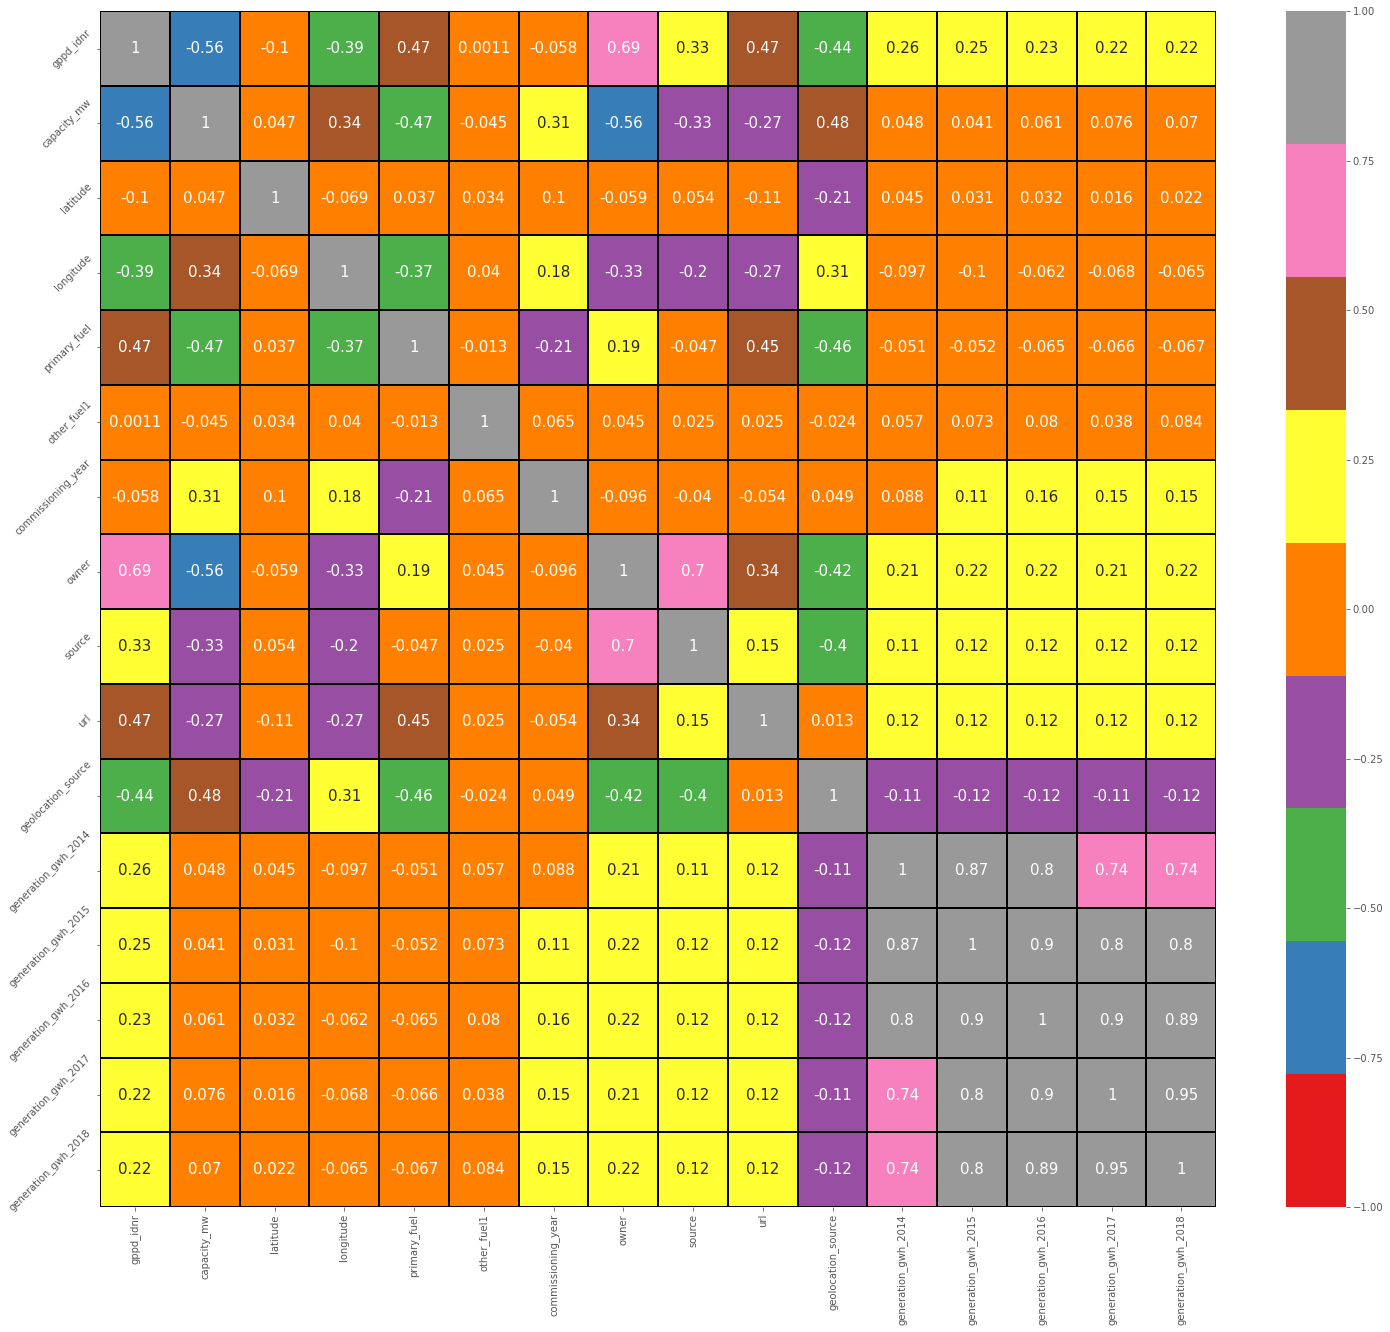

In [60]:
plt.figure(figsize=(25,22))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="Set1")
plt.yticks(rotation=45)

In [61]:
c_df=df1
df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.745043,-1.702823,1.177697,-0.932948,1.137091,0.059339,1.255009,1.451412,1.532355,0.716007,-2.249375,0.273351,0.286784,0.287998,0.278209,0.289559
1,0.253198,0.228771,0.585301,-0.514772,-0.994265,0.059339,-0.169152,1.476865,1.986063,1.188696,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
2,1.387818,-0.264902,0.102221,-2.362417,1.407230,0.059339,-0.169152,-1.818479,-0.486798,1.464392,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
3,-2.164340,0.397754,0.432816,2.453912,-0.377697,0.059339,0.503424,-0.753214,-0.420135,-0.428614,0.407930,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,-2.144553,1.694836,0.111620,1.254317,-0.994265,0.059339,1.721800,-0.753214,-0.420135,-0.428614,0.407930,0.641878,2.144288,2.182595,1.689873,2.356123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0.156069,1.638421,-0.802164,0.214945,-0.994265,0.059339,1.843138,-0.753214,-0.420135,-0.428614,0.407930,0.273351,-1.893977,-1.353199,-0.765175,-0.885516
851,1.288965,-1.620575,-1.327672,0.405222,1.137091,0.059339,-0.169152,1.271630,1.162950,-1.648040,-2.457754,0.273351,0.286784,0.287998,0.278209,0.289559
852,1.507493,-0.500289,-0.961244,-0.240902,1.407230,0.059339,-0.169152,-0.753214,-0.486798,1.862175,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
853,0.326851,0.120706,0.514231,-0.773310,-0.994265,0.059339,-0.169152,1.199225,0.860180,0.055141,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559


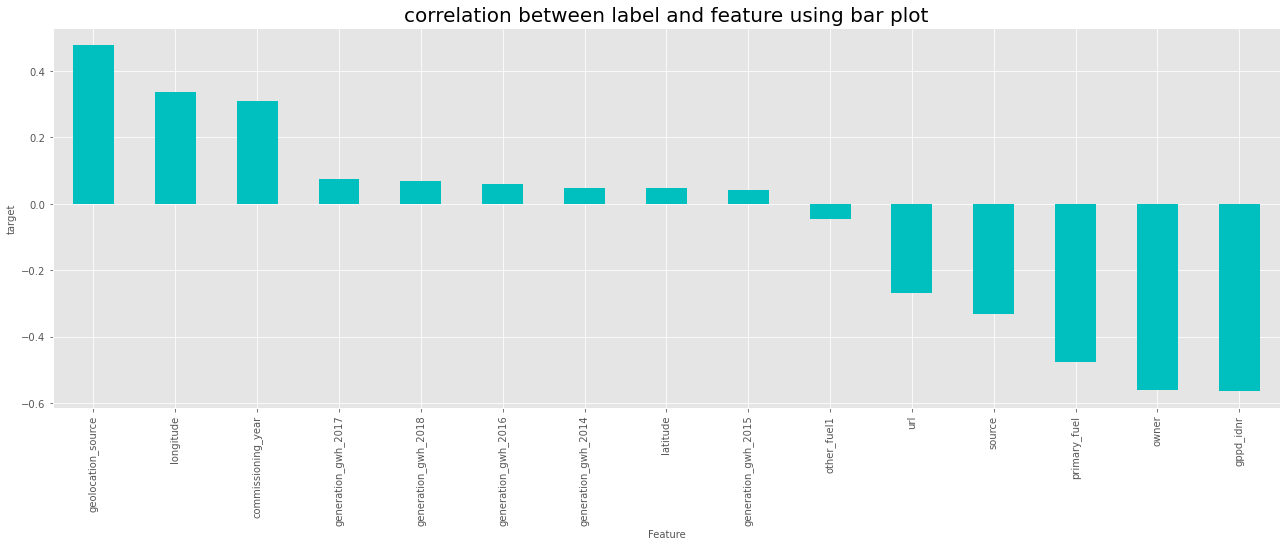

In [62]:
plt.figure(figsize=(22,7))
df1.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [63]:
df1.drop('other_fuel1',axis=1,inplace=True)
df1.drop('latitude',axis=1,inplace=True)
df1.drop('gppd_idnr',axis=1,inplace=True)

In [64]:
x=df1.drop('capacity_mw',axis=1)
y=df1['capacity_mw']

In [65]:
x.shape

(855, 12)

In [66]:
y.shape

(855,)

In [67]:
print(x.shape)
print(y.shape)

(855, 12)
(855,)


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932948,1.137091,1.255009,1.451412,1.532355,0.716007,-2.249375,0.273351,0.286784,0.287998,0.278209,0.289559
1,-0.514772,-0.994265,-0.169152,1.476865,1.986063,1.188696,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
2,-2.362417,1.407230,-0.169152,-1.818479,-0.486798,1.464392,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
3,2.453912,-0.377697,0.503424,-0.753214,-0.420135,-0.428614,0.407930,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,1.254317,-0.994265,1.721800,-0.753214,-0.420135,-0.428614,0.407930,0.641878,2.144288,2.182595,1.689873,2.356123
...,...,...,...,...,...,...,...,...,...,...,...,...
850,0.214945,-0.994265,1.843138,-0.753214,-0.420135,-0.428614,0.407930,0.273351,-1.893977,-1.353199,-0.765175,-0.885516
851,0.405222,1.137091,-0.169152,1.271630,1.162950,-1.648040,-2.457754,0.273351,0.286784,0.287998,0.278209,0.289559
852,-0.240902,1.407230,-0.169152,-0.753214,-0.486798,1.862175,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
853,-0.773310,-0.994265,-0.169152,1.199225,0.860180,0.055141,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559


In [69]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.306309,longitude
1,2.436898,primary_fuel
2,1.120586,commissioning_year
3,2.518020,owner
4,2.427537,source
5,1.810273,url
6,2.201782,geolocation_source
7,4.309821,generation_gwh_2014
8,8.306752,generation_gwh_2015
9,10.921830,generation_gwh_2016


In [70]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train, y_train)
    predrfr = rfr.predict(x_test)
    acc=r2_score(y_test, predrfr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8543638409287884  on Random_state  27


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state =27)

In [74]:
x_train

,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
579,0.267947,1.407230,-0.169152,1.391120,-0.486798,1.565976,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
671,0.240981,0.100239,-0.625515,-0.753214,-0.420135,-0.428614,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
12,1.321525,-0.994265,1.255009,-0.753214,-0.420135,-0.428614,0.407930,3.060456,3.134230,2.898199,2.781063,2.582033
35,-1.457849,1.137091,-0.169152,1.366972,1.258125,0.344179,-2.457754,0.273351,0.286784,0.287998,0.278209,0.289559
632,-1.186649,1.407230,-0.169152,1.410984,-0.486798,1.829155,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.164931,-0.377697,-0.169152,1.360370,1.522924,0.617466,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
543,0.134616,0.100239,-1.420990,-0.753214,-0.420135,-0.428614,0.407930,-1.594840,-1.460242,-1.643246,-1.507640,-1.514602
840,-0.736873,0.100239,-0.084104,-0.753214,-0.420135,-0.428614,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
696,0.240981,0.100239,-0.625515,-0.753214,-0.420135,-0.428614,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559


In [75]:
x_test

,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
448,1.287724,-0.994265,1.721800,-0.753214,-0.420135,-0.428614,0.407930,-2.018830,-1.670803,0.119638,1.669918,1.870645
517,0.240981,1.407230,-0.169152,1.379471,-0.486798,1.382438,0.407930,0.273351,0.286784,0.287998,0.278209,0.289559
166,0.305640,0.100239,-2.382415,-0.753214,-0.420135,-0.428614,0.407930,-1.603957,-1.519444,-1.525972,-1.507289,-1.458711
331,-0.896205,0.100239,0.302327,-0.753214,-0.420135,-0.428614,0.407930,-1.383861,-1.340793,-1.263235,-1.257212,-1.206296
760,-0.647973,0.100239,-1.118654,-0.753214,-0.420135,-0.428614,0.407930,-1.666777,-1.710144,-1.551512,-1.648603,-1.521209
...,...,...,...,...,...,...,...,...,...,...,...,...
126,-1.498653,1.137091,-0.169152,1.301395,1.258125,0.329331,-2.457754,0.273351,0.286784,0.287998,0.278209,0.289559
450,1.171712,-0.994265,2.091660,-0.753214,-0.420135,-0.428614,0.407930,0.273351,0.286784,0.287998,-1.884348,-1.615030
601,2.093862,0.100239,-0.360767,-0.753214,-0.420135,-0.428614,0.407930,-1.471019,-1.350307,-1.335424,-1.519483,-1.330945
134,-0.132176,0.100239,-0.450359,-0.753214,-0.420135,-0.428614,0.407930,0.340299,0.395919,0.139118,0.157684,0.221492


In [76]:
y_train

579   -1.016199
671   -0.691289
12     1.499645
35    -1.373332
632   -1.280327
         ...   
824    0.086178
543   -0.411187
840   -0.755737
696   -1.484040
19    -0.722580
Name: capacity_mw, Length: 598, dtype: float64

In [77]:
y_test

448    1.410963
517   -0.455896
166   -0.346700
331    0.064298
760   -0.033799
         ...   
126   -1.373332
450    1.206694
601   -0.132468
134    1.106952
718   -1.373332
Name: capacity_mw, Length: 257, dtype: float64

In [78]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (598, 12)
x_test shape = (257, 12)
y_train shape = (598,)
y_test shape = (257,)


In [79]:
lr= LinearRegression()
rd= Ridge()
ls= Lasso()
dtr= DecisionTreeRegressor()
svr= SVR()
knr= KNeighborsRegressor()
rfr= RandomForestRegressor()
en= ElasticNet()
sr= SGDRegressor()
br=BaggingRegressor()
abr=AdaBoostRegressor()
gbr= GradientBoostingRegressor()

In [80]:
model=[lr,rd,ls,dtr,svr,knr,rfr,en,sr,br,abr,gbr]

In [81]:
for i in model:
    p=i
    p.fit(x_train,y_train)
    print("accuracy score of",i,"is =",p.score(x_train,y_train))
    scr=cross_val_score(i,x,y,cv=4)
    print("cross validation score of",i,"is =",scr.mean())
    print("\n")
    print("#"*50)

accuracy score of LinearRegression() is = 0.5042135950182138
cross validation score of LinearRegression() is = 0.5187515506330364


##################################################
accuracy score of Ridge() is = 0.5042110126665678
cross validation score of Ridge() is = 0.5188162643708466


##################################################
accuracy score of Lasso() is = 0.0
cross validation score of Lasso() is = -0.006080113822009403


##################################################
accuracy score of DecisionTreeRegressor() is = 0.9993255590035531
cross validation score of DecisionTreeRegressor() is = 0.6505119129653054


##################################################
accuracy score of SVR() is = 0.7290491208227157
cross validation score of SVR() is = 0.6875159886431423


##################################################
accuracy score of KNeighborsRegressor() is = 0.7754408893669784
cross validation score of KNeighborsRegressor() is = 0.6591500711085077


###################

In [82]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':["squared_error", "absolute_error", "poisson"]}
gcv1=GridSearchCV(GradientBoostingRegressor(),parameters,cv=6,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto'}

In [83]:
gcv1.best_estimator_

GradientBoostingRegressor(criterion='squared_error', max_depth=4,
                          max_features='auto')

In [84]:
gcvpred1=gcv1.best_estimator_.predict(x_test)
gcv1.best_estimator_.score(x_train,y_train)

0.9348488208568102

In [85]:
final_model=GradientBoostingRegressor(max_depth=4)

In [90]:
final_model.fit(x_test,y_test)
pred=final_model.predict(x_test)
final_model.fit(x_train,y_train)
pred1=final_model.predict(x_train)

In [91]:
print("Test Accuracy=",final_model.score(x_test,y_test))
print("Train Accuracy=",final_model.score(x_train,y_train))

Test Accuracy= 0.8446268426138431
Train Accuracy= 0.9348488208568102


In [92]:
joblib.dump(final_model,"Global Power Plant Database(capacity_mw).pkl")

['Global Power Plant Database(capacity_mw).pkl']

In [93]:
model=joblib.load("Global Power Plant Database(capacity_mw).pkl")

In [94]:
Prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":Prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1.410963,1.398681
1,-0.455896,-0.745336
2,-0.346700,-0.140777
3,0.064298,0.372593
4,-0.033799,0.021641
...,...,...
252,-1.373332,-1.706746
253,1.206694,1.176772
254,-0.132468,0.029887
255,1.106952,0.197217


In [95]:
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":Prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1.410963,1.398681
1,-0.455896,-0.745336
2,-0.346700,-0.140777
3,0.064298,0.372593
4,-0.033799,0.021641
...,...,...
252,-1.373332,-1.706746
253,1.206694,1.176772
254,-0.132468,0.029887
255,1.106952,0.197217


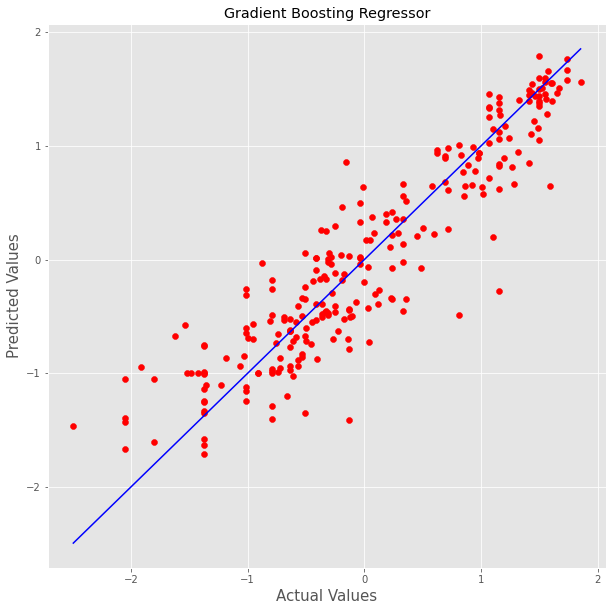

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Prediction, c='r')
plt1 = max(max(Prediction), max(y_test))
plt2 = min(min(Prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Gradient Boosting Regressor")
plt.show()

# Classification Problem

In [113]:
c_df

,capacity_mw,longitude,Primary_Fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.702823,-0.932948,6.0,53.0,1.451412,1.532355,0.716007,1.0,0.273351,0.286784,0.287998,0.278209,0.289559
1,0.228771,-0.514772,1.0,39.0,1.476865,1.986063,1.188696,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
2,-0.264902,-2.362417,7.0,39.0,-1.818479,-0.486798,1.464392,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
3,0.397754,2.453912,2.0,46.0,-0.753214,-0.420135,-0.428614,2.0,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,1.694836,1.254317,1.0,57.0,-0.753214,-0.420135,-0.428614,2.0,0.641878,2.144288,2.182595,1.689873,2.356123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.638421,0.214945,1.0,58.0,-0.753214,-0.420135,-0.428614,2.0,0.273351,-1.893977,-1.353199,-0.765175,-0.885516
851,-1.620575,0.405222,6.0,39.0,1.271630,1.162950,-1.648040,0.0,0.273351,0.286784,0.287998,0.278209,0.289559
852,-0.500289,-0.240902,7.0,39.0,-0.753214,-0.486798,1.862175,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
853,0.120706,-0.773310,1.0,39.0,1.199225,0.860180,0.055141,2.0,0.273351,0.286784,0.287998,0.278209,0.289559


In [114]:
c_df.rename(columns={'primary_fuel':'Primary_Fuel'},inplace=True)

In [115]:
c_df.nunique().to_frame('unique values')

,unique values
capacity_mw,334
longitude,782
Primary_Fuel,8
commissioning_year,61
owner,279
source,191
url,304
geolocation_source,3
generation_gwh_2014,333
generation_gwh_2015,358


In [116]:
list=['Primary_Fuel','commissioning_year','geolocation_source']

In [117]:
le = LabelEncoder()
for i in list:
    c_df[i]=le.fit_transform(c_df[i]).astype(float)

In [118]:
c_df.head()

,capacity_mw,longitude,Primary_Fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.702823,-0.932948,6.0,53.0,1.451412,1.532355,0.716007,1.0,0.273351,0.286784,0.287998,0.278209,0.289559
1,0.228771,-0.514772,1.0,39.0,1.476865,1.986063,1.188696,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
2,-0.264902,-2.362417,7.0,39.0,-1.818479,-0.486798,1.464392,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
3,0.397754,2.453912,2.0,46.0,-0.753214,-0.420135,-0.428614,2.0,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,1.694836,1.254317,1.0,57.0,-0.753214,-0.420135,-0.428614,2.0,0.641878,2.144288,2.182595,1.689873,2.356123


In [119]:
x=c_df.drop("Primary_Fuel",axis=1)
y=c_df["Primary_Fuel"]

In [120]:
x

,capacity_mw,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.702823,-0.932948,53.0,1.451412,1.532355,0.716007,1.0,0.273351,0.286784,0.287998,0.278209,0.289559
1,0.228771,-0.514772,39.0,1.476865,1.986063,1.188696,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
2,-0.264902,-2.362417,39.0,-1.818479,-0.486798,1.464392,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
3,0.397754,2.453912,46.0,-0.753214,-0.420135,-0.428614,2.0,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,1.694836,1.254317,57.0,-0.753214,-0.420135,-0.428614,2.0,0.641878,2.144288,2.182595,1.689873,2.356123
...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.638421,0.214945,58.0,-0.753214,-0.420135,-0.428614,2.0,0.273351,-1.893977,-1.353199,-0.765175,-0.885516
851,-1.620575,0.405222,39.0,1.271630,1.162950,-1.648040,0.0,0.273351,0.286784,0.287998,0.278209,0.289559
852,-0.500289,-0.240902,39.0,-0.753214,-0.486798,1.862175,2.0,0.273351,0.286784,0.287998,0.278209,0.289559
853,0.120706,-0.773310,39.0,1.199225,0.860180,0.055141,2.0,0.273351,0.286784,0.287998,0.278209,0.289559


In [121]:
y

0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
850    1.0
851    6.0
852    7.0
853    1.0
854    7.0
Name: Primary_Fuel, Length: 855, dtype: float64

In [122]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [123]:
x.value_counts()

capacity_mw  longitude  commissioning_year  owner      source     url        geolocation_source  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  generation_gwh_2018
-2.494265     0.291093  39.000000            1.466875   1.942556   1.093596  0.0                  0.273351             0.286784             0.287998             0.278209             0.289559              1
 0.623545    -0.368555  43.000000           -0.753214  -0.420135  -0.428614  2.0                 -1.964376            -1.854843            -1.846090            -1.841259            -1.843794              1
 0.508369    -0.359331  33.095698           -0.753214  -0.420135  -0.428614  2.0                 -2.018830            -1.906902            -1.894064            -1.677396            -1.884631              1
 0.507345    -0.445272  39.000000            1.329254   1.355694   2.067432  2.0                  0.273351             0.286784             0.287998             0.278209            

In [124]:
y.value_counts()

6.0    241
1.0    241
7.0    241
2.0    241
3.0    241
0.0    241
5.0    241
4.0    241
Name: Primary_Fuel, dtype: int64

In [125]:
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.809616,-0.860412,1.470966,1.346806,1.388867,0.667278,-1.171963,0.204722,0.225728,0.256345,0.240049,0.273580
1,0.189536,-0.382188,-0.055171,1.371899,1.844571,1.149015,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580
2,-0.321404,-2.495145,-0.055171,-1.876802,-0.639174,1.429988,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580
3,0.364429,3.012783,0.707898,-0.826615,-0.572217,-0.499251,0.372250,-0.985315,-0.735659,-0.656533,-0.932986,-0.856632
4,1.706878,1.640934,1.907006,-0.826615,-0.572217,-0.499251,0.372250,0.537578,1.907577,1.955891,1.617172,2.180495
...,...,...,...,...,...,...,...,...,...,...,...,...
1923,-1.356437,0.482087,-0.055171,1.351460,-0.639174,1.808508,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580
1924,-0.193110,-0.370503,-0.055171,-0.826615,-0.639174,1.924234,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580
1925,-0.700328,0.414808,-0.055171,1.244211,-0.639174,1.314189,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580
1926,0.098606,-1.971216,-0.055171,-0.826615,-0.639174,1.750434,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580


In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,2.523393,capacity_mw
1,1.242404,longitude
2,1.100696,commissioning_year
3,3.917862,owner
4,2.383553,source
5,1.185911,url
6,1.471621,geolocation_source
7,7.603116,generation_gwh_2014
8,12.354692,generation_gwh_2015
9,17.860371,generation_gwh_2016


In [127]:
maxAccu=0
maxRS=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is :',maxAccu,'Random state:',maxRS) 

Best accuracy is : 0.853195164075993 Random state: 765


In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=765)

In [129]:
x_train

,capacity_mw,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1650,-0.593300,-0.946762,-0.055171,1.237478,1.301670,0.521060,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580
451,1.560124,2.455605,0.380868,-0.826615,-0.572217,-0.499251,0.372250,1.760550,1.557237,1.741743,2.031568,1.825995
238,-2.170950,-1.124626,-0.055171,1.386886,1.278329,-1.542087,-2.716176,0.204722,0.225728,0.256345,0.240049,0.273580
930,-0.831167,-0.345699,-0.055171,1.357666,1.793227,-1.032252,0.372250,0.204722,0.225728,0.256345,0.240049,0.273580
1291,1.328023,-0.966733,-0.414041,-0.826615,-0.572217,-0.499251,0.372250,2.171797,1.841264,1.153964,0.309972,1.444072
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.992307,1.145932,-1.555164,-0.826615,-0.572217,-0.499251,0.372250,0.166065,0.495489,0.486233,0.335790,-0.340606
558,-0.369537,0.693652,-1.254279,-0.826615,-0.572217,-0.499251,0.372250,-1.785849,-1.760511,-1.449601,-1.697164,-1.569430
516,1.504859,1.197463,1.688986,-0.826615,-0.572217,-0.499251,0.372250,1.606618,1.957668,1.822124,1.644513,1.819284
1754,-1.468601,-1.460706,-0.055171,1.214502,1.113430,0.288333,-2.716176,0.204722,0.225728,0.256345,0.240049,0.273580


In [130]:
x_test

,capacity_mw,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1360,1.618087,0.184816,1.157013,-0.826615,-0.572217,-0.499251,0.37225,1.621962,1.201848,1.922147,2.631778,1.822814
1368,1.619937,0.214786,0.203129,-0.826615,0.329080,1.199337,0.37225,0.784126,0.950032,0.788999,0.914335,0.827790
1597,-0.043440,-0.878561,-0.055171,1.327884,1.653711,0.946096,0.37225,0.204722,0.225728,0.256345,0.240049,0.273580
1655,-0.140864,-0.876958,-0.055171,1.340681,1.709545,0.988462,0.37225,0.204722,0.225728,0.256345,0.240049,0.273580
1442,1.528987,-0.661520,-0.051106,-0.826615,-0.572217,-0.499251,0.37225,2.963500,3.044544,2.832042,2.217868,2.680859
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,-0.593393,-0.935839,-0.055171,1.264335,1.408279,0.637052,0.37225,0.204722,0.225728,0.256345,0.240049,0.273580
328,0.142702,1.310452,1.470966,-0.826615,-0.572217,-0.499251,0.37225,-1.114445,-1.214870,-1.099509,-1.448168,-1.370661
993,-0.715576,-0.392367,-0.055171,1.074120,0.629779,-0.078407,0.37225,0.204722,0.225728,0.256345,0.240049,0.273580
947,-0.694450,-0.331628,-0.055171,1.338796,1.703630,0.498032,0.37225,0.204722,0.225728,0.256345,0.240049,0.273580


In [131]:
y_train

1650    5.0
451     1.0
238     6.0
930     0.0
1291    4.0
       ... 
1307    4.0
558     3.0
516     1.0
1754    6.0
1053    2.0
Name: Primary_Fuel, Length: 1349, dtype: float64

In [132]:
y_test

1360    4.0
1368    4.0
1597    5.0
1655    5.0
1442    4.0
       ... 
1622    5.0
328     1.0
993     0.0
947     0.0
1338    4.0
Name: Primary_Fuel, Length: 579, dtype: float64

In [133]:
print('x_train shape=',x_train.shape)
print('x_test shape=',x_train.shape)
print('y_train shape=',y_train.shape)
print('y_test shape=',y_test.shape)

x_train shape= (1349, 12)
x_test shape= (1349, 12)
y_train shape= (1349,)
y_test shape= (579,)


In [134]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [135]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [136]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.853195164075993
[[78  0  0  0  0  0  0  2]
 [ 7 38  9  3  7  1  0  1]
 [ 2  3 46  4  2  4  0  1]
 [ 0  7 11 49  1  3  0  0]
 [ 0  5  0  2 69  0  0  0]
 [ 1  1  4  0  0 71  0  1]
 [ 0  0  0  0  0  0 71  2]
 [ 0  0  0  0  1  0  0 72]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        80
         1.0       0.70      0.58      0.63        66
         2.0       0.66      0.74      0.70        62
         3.0       0.84      0.69      0.76        71
         4.0       0.86      0.91      0.88        76
         5.0       0.90      0.91      0.90        78
         6.0       1.00      0.97      0.99        73
         7.0       0.91      0.99      0.95        73

    accuracy                           0.85       579
   macro avg       0.85      0.84      0.84       579
weighted avg       0.85      0.85      0.85       579

#######################################################################

In [137]:
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.7909751037344399
cross validation score of GaussianNB() is = 0.5783195020746887
cross validation score of SVC() is = 0.825207468879668
cross validation score of DecisionTreeClassifier() is = 0.8573651452282158
cross validation score of KNeighborsClassifier() is = 0.8428423236514523
cross validation score of RandomForestClassifier() is = 0.8915975103734439
cross validation score of GradientBoostingClassifier() is = 0.8915975103734439
cross validation score of AdaBoostClassifier() is = 0.3744813278008299
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.795645735123359
cross validation score of GaussianNB() is = 0.5793536592652885
cross validation score of SVC() is = 0.8314397885043662
cross validation score of DecisionTreeClassifier() is = 0.8744890658889002
cross validation score of KNeighborsClassifier() is

In [139]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=6,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [140]:
gcv1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [141]:
final_model=gcv1.best_estimator_

In [142]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))

Test Accuracy score of final model = 0.9050086355785838
Train Accuracy score of final model = 0.9525574499629355


In [143]:
import joblib
joblib.dump(final_model,"Global Power Plant Database(Primary_Fuel).pkl")

['Global Power Plant Database(Primary_Fuel).pkl']

In [144]:
model=joblib.load("Global Power Plant Database(Primary_Fuel).pkl")
Prediction = model.predict(x_test)
Prediction

array([4., 4., 5., 5., 4., 5., 0., 5., 5., 7., 1., 1., 0., 7., 0., 0., 4.,
       2., 1., 4., 6., 0., 1., 4., 7., 6., 4., 7., 2., 2., 5., 0., 0., 3.,
       7., 7., 3., 0., 5., 7., 6., 6., 0., 5., 5., 7., 4., 5., 4., 7., 2.,
       5., 2., 5., 3., 4., 6., 3., 5., 1., 2., 6., 1., 3., 4., 1., 5., 1.,
       4., 1., 4., 7., 0., 2., 1., 3., 5., 3., 0., 5., 6., 2., 4., 6., 7.,
       6., 5., 2., 5., 4., 7., 2., 7., 3., 3., 0., 2., 3., 6., 6., 3., 0.,
       3., 4., 0., 1., 5., 4., 7., 4., 0., 6., 6., 0., 3., 2., 0., 7., 6.,
       6., 7., 0., 0., 0., 7., 0., 4., 4., 7., 7., 0., 2., 1., 5., 0., 6.,
       7., 0., 4., 0., 6., 4., 0., 3., 3., 6., 4., 4., 2., 7., 0., 0., 0.,
       4., 1., 6., 5., 6., 3., 6., 6., 5., 3., 7., 0., 2., 4., 6., 7., 7.,
       6., 5., 5., 7., 4., 2., 2., 2., 4., 4., 2., 5., 6., 2., 4., 3., 5.,
       3., 6., 1., 4., 7., 1., 2., 2., 0., 1., 5., 6., 1., 7., 6., 4., 1.,
       6., 1., 5., 7., 1., 7., 4., 5., 5., 2., 2., 2., 6., 3., 2., 1., 4.,
       3., 2., 2., 0., 7.

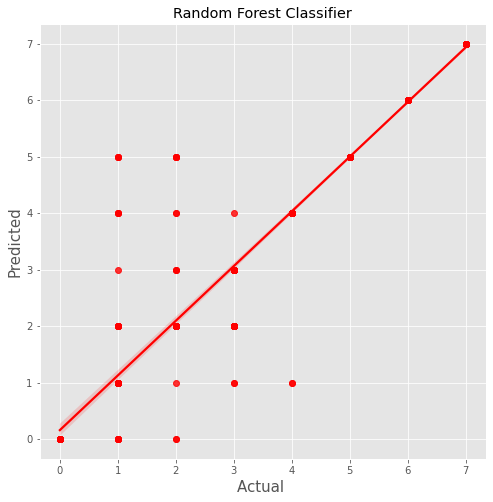

In [145]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,Prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Random Forest Classifier")
plt.show()